In [9]:
import math, glob, os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import importlib
import wrftools as wrf
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [15]:
importlib.reload(wrf)

run='run_02_land_t10'
wolist=wrf.wolist(run)[:24]
# wolist=(wolist[0],wolist[1], wolist[10])
flistw=[wrf.wopath(run,wo) for wo in wolist]

run='run_02_land_dry_t10'
wolist=wrf.wolist(run)[:24]
# wolist=(wolist[1], wolist[10])
flistd=[wrf.wopath(run,wo) for wo in wolist]

flist=flistw+flistd

r=wrf.getRcoord(flist[0])

zx=19 # 6.8 km

strs=['0h','1h wet','10h wet','1h dry','10h dry']

In [16]:
def get_z_slice(fname,vname,zx):
    vt=wrf.getWRF(fname,vname,z=zx,vtype='az')
    return(vt)

Creating: run_02_land_t10/wrfout_d03_2007-09-10_00:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_01:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_02:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_03:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_04:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_05:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_06:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_07:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_08:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_09:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_10:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_11:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_12:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_13:00:00.vt.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_13:00:00.vt.ra

Text(0.5, 0.98, 'z= 6.82 km')

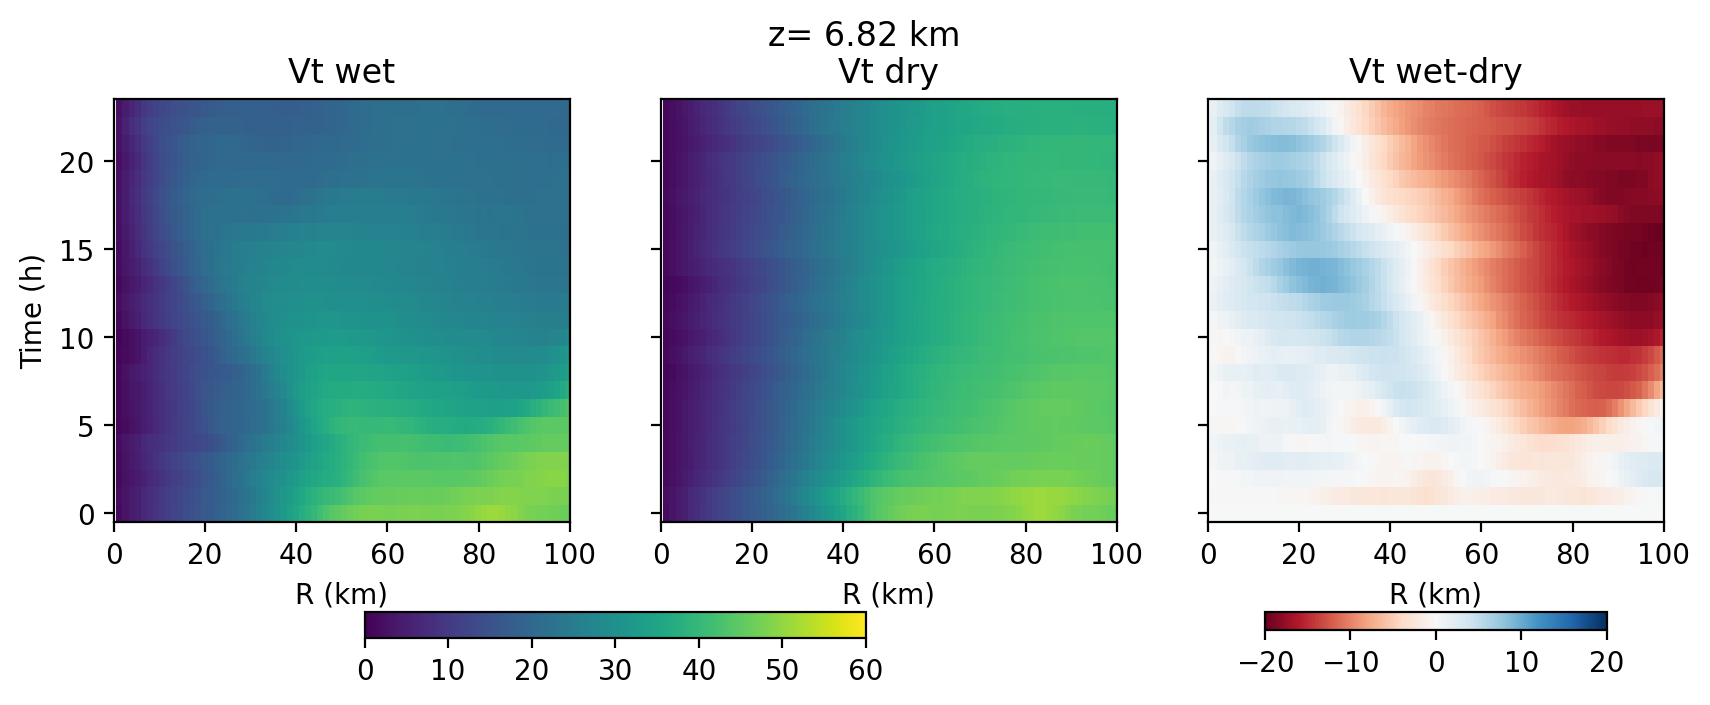

In [17]:
zx=19
vname='vt'
r=wrf.getRcoord(flistw[0])
hs=wrf.getHeightCoord(flistw[0])
# fname=flistw[0]
vtz=[]
for fname in flistw:
    vtz.append(get_z_slice(fname,vname,zx))
vtz=np.stack(vtz)

vtdz=[]
for fname in flistd:
    vtdz.append(get_z_slice(fname,vname,zx))
vtdz=np.stack(vtdz)

ts=np.arange(0,len(flistw))

fig,axs=plt.subplots(1,3,figsize=(10,4),dpi=200,sharey=True)

ax=axs[0]
im=ax.pcolormesh(r,ts,vtz,cmap=plt.get_cmap('viridis'),shading='nearest')
ax.set_xlim(0,100)
im.set_clim(0,60)
ax.set_ylabel('Time (h)')
ax.set_xlabel('R (km)')
ax.set_title('Vt wet')

ax=axs[1]
im=ax.pcolormesh(r,ts,vtdz,cmap=plt.get_cmap('viridis'),shading='nearest')
ax.set_xlim(0,100)
im.set_clim(0,60)
ax.set_xlabel('R (km)')
ax.set_title('Vt dry')
fig.colorbar(im,ax=axs[:2],orientation='horizontal',shrink=0.5)


ax=axs[2]
im=ax.pcolormesh(r,ts,vtz-vtdz,cmap=plt.get_cmap('RdBu'),shading='nearest')
ax.set_xlim(0,100)
im.set_clim(-20,20)
ax.set_xlabel('R (km)')
ax.set_title('Vt wet-dry')
fig.colorbar(im,ax=ax,shrink=0.75,orientation='horizontal')

h=hs[zx]
fig.suptitle('z= ' + str(round(h/1000,2)) + ' km')


In [18]:
cmap = cm.get_cmap('tab10')

def getVmax(flist,vstr='V',zx=0):
    V10max=[]
    for fname in flist:
        vmax,rmax,zmax,t=wrf.wrf2max(fname,vstr,z=zx)
        V10max.append(vmax)
    return(V10max)
    
Vmax10w=getVmax(flistw)
Vmax10d=getVmax(flistd)
Vmax7kw=getVmax(flistw,zx=19)
Vmax7kd=getVmax(flistd,zx=19)

Creating: run_02_land_t10/wrfout_d03_2007-09-10_13:00:00.V10.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_13:00:00.V10.raw.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_14:00:00.V10.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_14:00:00.V10.raw.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_15:00:00.V10.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_15:00:00.V10.raw.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_16:00:00.V10.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_16:00:00.V10.raw.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_17:00:00.V10.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_17:00:00.V10.raw.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_18:00:00.V10.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_18:00:00.V10.raw.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_19:00:00.V10.az.npy
Creating: run_02_land_t10/wrfout_d03_2007-09-10_19:00:00.V10.raw.npy
Creating: run_02_land_t10/wrfout_d03_2007

(0.0, 24.0)

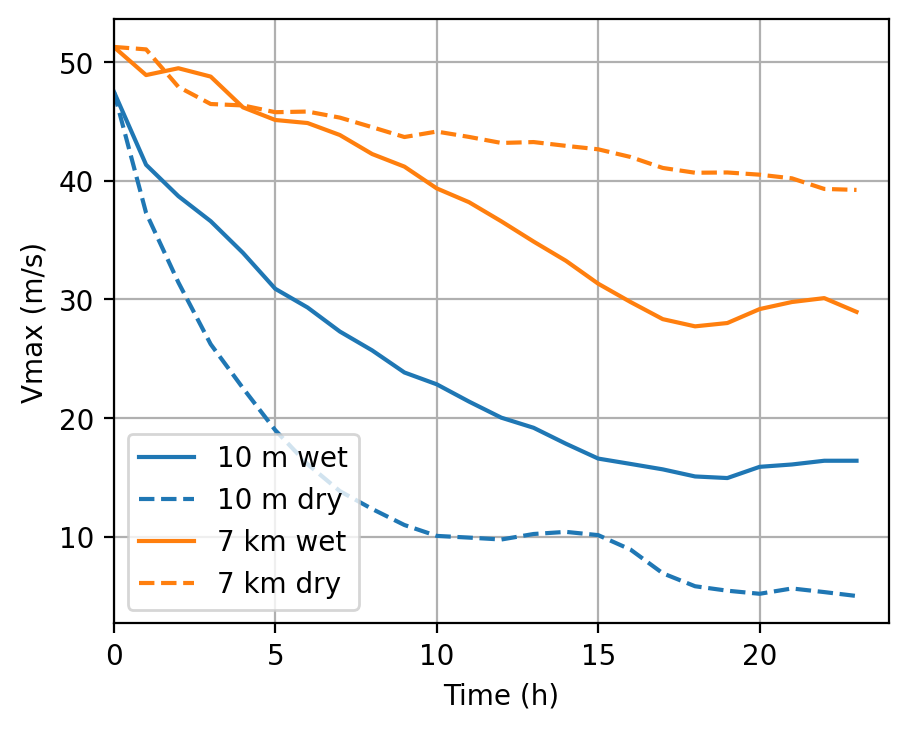

In [19]:
fig,ax=plt.subplots(1,1,dpi=200,figsize=(5,4))
ax.plot(Vmax10w,color=cmap(0))
ax.plot(Vmax10d,color=cmap(0),ls='--')
ax.plot(Vmax7kw,color=cmap(1))
ax.plot(Vmax7kd,color=cmap(1),ls='--')
ax.grid(True)
ax.set_ylabel('Vmax (m/s)')
ax.set_xlabel('Time (h)')
ax.legend(('10 m wet','10 m dry','7 km wet','7 km dry'))
ax.set_xlim(0,24)